In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [163]:
top = pd.read_csv('top200.csv')
bottom = pd.read_csv('bottom200.csv')
top['type'] = 0 # 0 for top
bottom['type'] = 1 # 1 for bottom
df = pd.concat([top, bottom], ignore_index=True)
df.head()

,title,artist,genre,rank,danceability,energy,key,loudness,mode,speechiness,...,tempo,duration_ms,time_signature,lyrics,winter,spring,summer,autumn,id,type
0,TOUT VA BIEN (feat. Ninho & Naps),Alonzo,"francoton, french hip hop, pop urbaine, rap fr...",1,0.660,0.720,3.0,-5.874,0.0,0.0753,...,99.937,192960.0,4.0,"[Paroles de ""TOUT VA BIEN"" ft. Naps & Ninho] [...",0,1,0,0,6OZwia8loN0aPS0vTvsBjR,0
1,FADE UP,ZEG P,NaN,2,0.758,0.599,4.0,-5.990,0.0,0.0877,...,129.960,219188.0,4.0,"[Paroles de ""FADE UP"" ft. Hamza & SCH] [Intro ...",0,0,1,0,4ZpIuzx91EAPK3VimONbfB,0
2,DIE,Gazo,"drill francais, rap francais",3,0.695,0.630,8.0,-7.160,0.0,0.0350,...,130.968,240413.0,4.0,"[Paroles de ""DIE""] [Intro] La mala est gangx E...",0,0,1,0,3D29kjUyWxsT3jUUTtARVQ,0
3,PETETE,Gambi,"french hip hop, pop urbaine, rap francais",4,0.752,0.669,10.0,-9.817,0.0,0.2510,...,155.997,123846.0,4.0,"[Paroles de ""PETETE""] [Intro] Pew Grr Pew pew ...",0,0,1,0,0z3bi63SNZ5ylyHOzb81Uq,0
4,Time Time,Trei Degete,NaN,5,0.715,0.799,0.0,-6.447,0.0,0.0433,...,128.925,156373.0,4.0,"[Paroles de ""Time Time""] [Couplet 1 : Squeezie...",0,0,0,1,5wKDPtbdggE1roeVp3UdXX,0


In [164]:
df = df.drop(['title', 'artist', 'rank', 'lyrics', 'genre', 'id'], axis = 1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,winter,spring,summer,autumn,type
0,0.660,0.720,3.0,-5.874,0.0,0.0753,0.3010,0.000000,0.2260,0.628,99.937,192960.0,4.0,0,1,0,0,0
1,0.758,0.599,4.0,-5.990,0.0,0.0877,0.5700,0.000001,0.1290,0.557,129.960,219188.0,4.0,0,0,1,0,0
2,0.695,0.630,8.0,-7.160,0.0,0.0350,0.2290,0.000000,0.1180,0.550,130.968,240413.0,4.0,0,0,1,0,0
3,0.752,0.669,10.0,-9.817,0.0,0.2510,0.1670,0.000000,0.0795,0.627,155.997,123846.0,4.0,0,0,1,0,0
4,0.715,0.799,0.0,-6.447,0.0,0.0433,0.0141,0.003500,0.3420,0.916,128.925,156373.0,4.0,0,0,0,1,0


In [165]:
Y = df.pop('type')
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

len(X_train), len(X_vali), len(X_test)

(1423, 474, 475)

In [166]:
X.fillna(0, inplace=True)

In [167]:
# Uncomment for CNN model

X_train = np.array(X_train)
X_test = np.array(X_test)
X_vali = np.array(X_vali)
X_train = X_train.reshape(X_train.shape[0],  X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)
X_vali = X_vali.reshape(X_vali.shape[0],  X_vali.shape[1], 1)
X_train.shape

(1423, 17, 1)

In [168]:
# CNN Model

model = keras.Sequential([
  layers.Conv1D(64, (3), activation='relu', padding='same', input_shape=(X_train.shape[1], 1 )),
  layers.MaxPooling1D((2)),
  layers.Dropout(0.2),
  layers.Conv1D(32, (3), activation='relu', padding='same'),
  layers.MaxPooling1D((2)),
  layers.Dropout(0.2),
  layers.Conv1D(16, (3), activation='relu', padding='same'),
  layers.MaxPooling1D((2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='softmax')
])
model.summary()

# Fully Connected Model

# model = keras.Sequential([
#   layers.Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
#   layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
#   layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
#   layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
#   layers.Dense(1, activation='sigmoid'),
# ])
# model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 17, 64)            256       
                                                                 
 max_pooling1d_33 (MaxPoolin  (None, 8, 64)            0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 8, 64)             0         
                                                                 
 conv1d_34 (Conv1D)          (None, 8, 32)             6176      
                                                                 
 max_pooling1d_34 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 4, 32)           

In [173]:
model.compile(
      optimizer=keras.optimizers.Adam(clipvalue=0.5), 
      loss='binary_crossentropy',
      metrics=['accuracy']
      )

In [177]:
earlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                             patience=20)

results = model.fit(X_train, y_train, 
                  batch_size=128,
                  epochs=200, 
                  validation_data=(X_vali, y_vali), 
                  callbacks=[earlyStop]
                  )

Epoch 1/200
12/12 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5538 - val_loss: nan - val_accuracy: 0.5506
Epoch 8/200
12/12 [==============================] - 0s

In [178]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.3f}")

15/15 [==============================] - 0s 895us/step - loss: nan - accuracy: 0.5705
Accuracy: 0.571


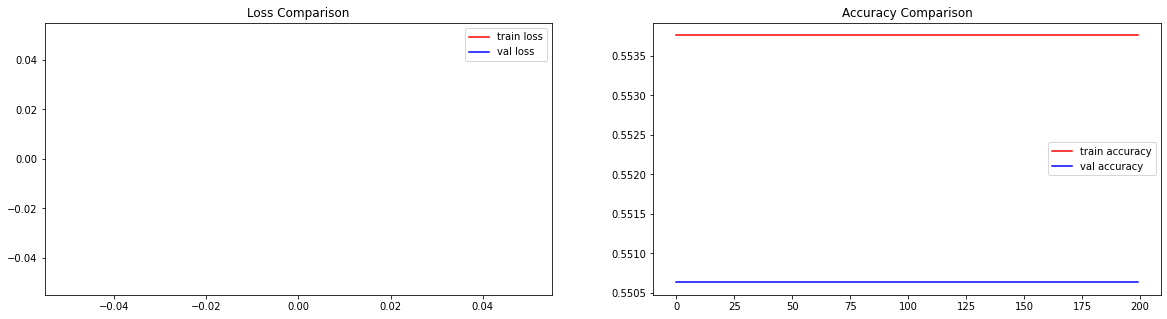

In [179]:
# Plotting the loss and accuracy of the model
fig, axis = plt.subplots(1, 2, figsize=(20, 5))
axis[0].plot(results.history["loss"], color='r', label = 'train loss')
axis[0].plot(results.history["val_loss"], color='b', label = 'val loss')
axis[0].set_title('Loss Comparison')
axis[0].legend()
axis[1].plot(results.history["accuracy"], color='r', label = 'train accuracy')
axis[1].plot(results.history["val_accuracy"], color='b', label = 'val accuracy')
axis[1].set_title('Accuracy Comparison')
axis[1].legend()